## Analysis of 1st day in the RCF study
Checking amygdala activation in the CS+US condition of the task
- masking amygdala
- avergaing activation
- plot

In [1]:
# load libraries
import glob
import pandas as pd
import numpy as np
import nilearn
import nilearn.plotting
import nilearn.input_data
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
subjectsDF = pd.read_csv('ReversalSIA - PCL4.tsv', sep = '\t')
subjectsDF_Nonvalid = subjectsDF[subjectsDF.SCRValid=='NO']
subjectsDF_Nonvalid

,sub_id,group,List,ScanDate,SCR,Resoponse2Shock,SCRValid,comment,MRI,num tasks,...,pcl10,pcl11,pcl12,pcl13,pcl14,pcl15,pcl16,pcl17,RCF?,RCF_Analyzed?
11,32,VPTSD,A,9/15/2011,v,3.0,NO,shock was not very aversive to her. I moved th...,v,1.0,...,4.0,2.0,4.0,5.0,5.0,5.0,4.0,4.0,no,NaN
14,44,VPTSD,A,9/23/2011,v,NaN,NO,only 5 trials are coded,bad scan,NaN,...,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,yes,no
17,52,VPTSD,A,10/17/2011,NaN,NaN,NO,no SCR file,never scanned,NaN,...,4.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,no,NaN
25,66,VPTSD,A,11/2/2011,v,5.0,NO,too few resp,v,2.0,...,5.0,5.0,3.0,4.0,5.0,4.0,3.0,3.0,no,NaN
28,73,VPTSD,A,11/16/2011,v,6.0,NO,too few resp,v,1.0,...,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,no,NaN
33,85,VPTSD,A,2/14/2012,v,8.0,NO,Couldn't get an aversive shock and therefore a...,v,2.0,...,1.0,2.0,1.0,2.0,2.0,1.0,4.0,2.0,no,NaN
43,110,VPTSD,NaN,1/24/2013,NaN,NaN,NO,no SCR file,NaN,NaN,...,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0,yes,no
46,118,VPTSD,B,NaN,v,NaN,NO,65 trials only artifacts are visible - no?,v,2.0,...,2.0,1.0,1.0,2.0,3.0,3.0,3.0,2.0,yes,no
51,135,VPTSD,NaN,5/8/2013,NaN,NaN,NO,no SCR file,v,1.0,...,3.0,3.0,3.0,4.0,2.0,2.0,3.0,2.0,yes,no
53,137,VCC,NaN,5/15/2013,NaN,NaN,NO,no SCR file,v,5.0,...,1.0,1.0,1.0,5.0,3.0,1.0,2.0,2.0,no,NaN


In [3]:
# check subjects with high FD
scrubFiles = glob.glob('/media/Data/work/RV_FSL/fsl_fit/_subject_id_*/svScrub/percentScrub.txt')
for file in scrubFiles:
    p = pd.read_csv(file)
    print(file, p)
# subject 47, 186, 55, 63 have 40% or more FD and should be excluded

/media/Data/work/RV_FSL/fsl_fit/_subject_id_013/svScrub/percentScrub.txt Empty DataFrame
Columns: [0.193841]
Index: []
/media/Data/work/RV_FSL/fsl_fit/_subject_id_026/svScrub/percentScrub.txt Empty DataFrame
Columns: [0.246377]
Index: []
/media/Data/work/RV_FSL/fsl_fit/_subject_id_102/svScrub/percentScrub.txt Empty DataFrame
Columns: [0]
Index: []
/media/Data/work/RV_FSL/fsl_fit/_subject_id_108/svScrub/percentScrub.txt Empty DataFrame
Columns: [0.0136187]
Index: []
/media/Data/work/RV_FSL/fsl_fit/_subject_id_087/svScrub/percentScrub.txt Empty DataFrame
Columns: [0.192607]
Index: []
/media/Data/work/RV_FSL/fsl_fit/_subject_id_1232/svScrub/percentScrub.txt Empty DataFrame
Columns: [0.0144928]
Index: []
/media/Data/work/RV_FSL/fsl_fit/_subject_id_113/svScrub/percentScrub.txt Empty DataFrame
Columns: [0]
Index: []
/media/Data/work/RV_FSL/fsl_fit/_subject_id_066/svScrub/percentScrub.txt Empty DataFrame
Columns: [0.128623]
Index: []
/media/Data/work/RV_FSL/fsl_fit/_subject_id_131/svScrub/per

In [4]:
# add zero to all subjects

Exclude = np.array(subjectsDF_Nonvalid.sub_id)
Exclude

array([  32,   44,   52,   66,   73,   85,  110,  118,  135,  137,  140,
        143,  147,  148,  151,  155,  159,  161,  183,  186,  187,  188,
        190, 1207, 1225])

In [5]:
## Screening subjects by SCR as Nachshon analyzed - 67% as US:
subject_list = [ '004', '005', '008', '010', '013', '016',  '026',
       '027', '030', '038', '043', '048', '053',
       '056', '059', '062', '065',  '071', '072', '082', '083', '086', '087',  '102', '103',
       '104', '106', '107', '108', '112', '113', '122', '124',
       '131', '132', '136',  '144', '146', '160', '165', '166', '169', '177',
       '178', '179', '182', '184', '185',  '203',  '205', '1205', '1222', '1223', '1232']
# 47, 186, 55, 63 have 40% or more FD 
# Invalid SCR 32,   44,   52,   66,   73,   85,  110,  118,  135,  137,  140,
#        143,  147,  148,  151,  155,  159,  161,  183,  186,  187,  188,
#        190, 1207, 1225
# '001' ,
# no data for some reasons  '081', '204', '021','101',
len(subject_list)

54

In [ ]:
## put all invalid SCRs
subject_list = [ '004', '005', '008', '010', '013', '016', '021', '026',
       '027', '030', '038', '043', '048', '053',
       '056', '059', '062', '065',  '071', '072', '082', '083', '086', '087', '101', '102', '103',
       '104', '106', '107', '108', '112', '113', '122', '124',
       '131', '132', '136',  '144', '146', '160', '165', '166', '169', '177',
       '178', '179', '182', '184', '185',  '203',  '205', '1205', '1222', '1223', '1232',
               '032',   '066',   '073',   '085',   '118',   
           '161',  '183',  '186', 
        '190', '1207']

In [ ]:
# lets remove all with flat SCR
# 8, 10, 21, 26, 56, 59, 63, 131, 1223
subject_list = ['001' , '004', '005', '013', '016', '026',
       '027', '030', '038', '043', '048', '053',
         '062', '065',  '071', '072', '082', '083', '086', '087', '101', '102', '103',
       '104', '106', '107', '108', '112', '113', '122', '124',
        '132', '136',  '144', '146', '160', '165', '166', '169', '177',
       '178', '179', '182', '184', '185',  '203', '204', '205', '1205', '1222', '1232']

In [ ]:
# remove also women 10, 32, 48, 110, 143, 144, 203
subject_list = ['001' , '004', '005', '013', '016', '026',
       '027', '030', '038', '043', '053', '062', '065',  '071', '072', '082',
                '083', '086', '087', '101', '102', '103',
       '104', '106', '107', '108', '112', '113', '122', '124',
        '132', '136',  '146', '160', '165', '166', '169', '177',
       '178', '179', '182', '184', '185',   '204', '205', '1205', '1222', '1232']

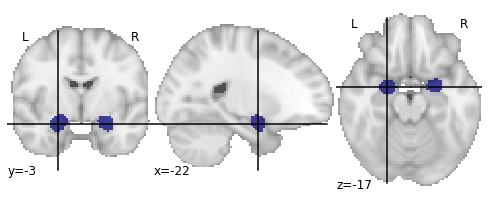

In [49]:
# load mask
mask_file = 'amygdala_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=25", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)

# create a masker 
fwhm = 0
masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                               sessions=None, smoothing_fwhm=fwhm, standardize=False, detrend=False, verbose=5)

In [78]:
us_cond = '/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_{sub}/results/cope{cope_num}.nii.gz'

cope_num = 2


In [79]:
us = []
timeseriesAmg = []
counter = 1 # set counter to give percentage of progress
for sub in subject_list:
   # try:
    func = us_cond.format(sub=sub, cope_num= cope_num)
    print(func)
    sub = func.split('id_')[1].split('/')[0]
    print(sub)
    print(f'\nFinished {counter/len(subject_list)*100}% of subjects')
    counter = counter +1 
    # amygdala
    tArr = masker.fit_transform(func)
    meanT = np.mean(tArr,axis=1)
    sem = scipy.stats.sem(tArr, axis=1)
    std = np.std(tArr, axis=1)
    

    # create datafram for the timeseries
    dfTS = {'sub_id':sub, 'ts':tArr[0]}
    # create dataframe for the mean activation
    df = {'sub_id':sub, 'amygdala':meanT[0], 'amgsem':sem[0], 'amgstd':std[0]}
    #df['subject'] = sub
    us.append(df)
    timeseriesAmg.append(dfTS)
    #except:
     #   print(f'Subject {sub} has no data')
amg_ud = pd.DataFrame(us)
tsDf = pd.DataFrame(timeseriesAmg)

/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_004/results/cope2.nii.gz
004

Finished 1.8518518518518516% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_005/results/cope2.nii.gz
005

Finished 3.7037037037037033% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_008/results/cope2.nii.gz
008

Finished 5.555555555555555% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling imag

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_013/results/cope2.nii.gz
013

Finished 9.25925925925926% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_016/results/cope2.nii.gz
016

Finished 11.11111111111111% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_026/results/cope2.nii.gz
026

Finished 12.962962962962962% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling ima

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_030/results/cope2.nii.gz
030

Finished 16.666666666666664% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_038/results/cope2.nii.gz
038

Finished 18.51851851851852% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_043/results/cope2.nii.gz
043

Finished 20.37037037037037% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling imag

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_053/results/cope2.nii.gz
053

Finished 24.074074074074073% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_056/results/cope2.nii.gz
056

Finished 25.925925925925924% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_059/results/cope2.nii.gz
059

Finished 27.77777777777778% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling imag

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_065/results/cope2.nii.gz
065

Finished 31.48148148148148% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_071/results/cope2.nii.gz
071

Finished 33.33333333333333% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_072/results/cope2.nii.gz
072

Finished 35.18518518518518% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling imag

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_083/results/cope2.nii.gz
083

Finished 38.88888888888889% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_086/results/cope2.nii.gz
086

Finished 40.74074074074074% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_087/results/cope2.nii.gz
087

Finished 42.592592592592595% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling ima

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_103/results/cope2.nii.gz
103

Finished 46.2962962962963% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_104/results/cope2.nii.gz
104

Finished 48.148148148148145% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_106/results/cope2.nii.gz
106

Finished 50.0% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMask

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_108/results/cope2.nii.gz
108

Finished 53.70370370370371% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_112/results/cope2.nii.gz
112

Finished 55.55555555555556% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_113/results/cope2.nii.gz
113

Finished 57.407407407407405% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling ima

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_124/results/cope2.nii.gz
124

Finished 61.111111111111114% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_131/results/cope2.nii.gz
131

Finished 62.96296296296296% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_132/results/cope2.nii.gz
132

Finished 64.81481481481481% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling imag

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_144/results/cope2.nii.gz
144

Finished 68.51851851851852% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_146/results/cope2.nii.gz
146

Finished 70.37037037037037% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_160/results/cope2.nii.gz
160

Finished 72.22222222222221% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling imag

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_166/results/cope2.nii.gz
166

Finished 75.92592592592592% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_169/results/cope2.nii.gz
169

Finished 77.77777777777779% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_177/results/cope2.nii.gz
177

Finished 79.62962962962963% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling imag

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_179/results/cope2.nii.gz
179

Finished 83.33333333333334% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_182/results/cope2.nii.gz
182

Finished 85.18518518518519% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_184/results/cope2.nii.gz
184

Finished 87.03703703703704% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling imag

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_203/results/cope2.nii.gz
203

Finished 90.74074074074075% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_205/results/cope2.nii.gz
205

Finished 92.5925925925926% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_1205/results/cope2.nii.gz
1205

Finished 94.44444444444444% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling im

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_1223/results/cope2.nii.gz
1223

Finished 98.14814814814815% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/work/RV_FSL/Sink_respNOScrub/1stLevel/_subject_id_1232/results/cope2.nii.gz
1232

Finished 100.0% of subjects
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/image.py:214: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Setting it to None (no smoothing will be performed)
  .format(fwhm))


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals


In [80]:
amg_ud

,sub_id,amygdala,amgsem,amgstd
0,004,-0.849716,0.047997,1.133788
1,005,-2.285916,0.048137,1.137088
2,008,-0.529714,0.104177,2.460864
3,010,1.684945,0.071670,1.692986
4,013,0.889636,0.064011,1.512079
5,016,1.407155,0.072522,1.713128
6,026,-0.823447,0.077243,1.824647
7,027,0.140133,0.069191,1.634433
8,030,0.737950,0.058536,1.382741
9,038,-0.822557,0.062065,1.466102


## look at group differences

In [81]:

subjectsDF['sub_id'] = subjectsDF['sub_id'].astype(int).astype(str)
for i in subjectsDF.iterrows():
    
    # change two numbers to three
    if len(i[1].sub_id) < 2:
        subjectsDF.at[i[0],'sub_id'] = '00' + i[1].sub_id
    elif len(i[1].sub_id) < 3:
        subjectsDF.at[i[0],'sub_id'] = '0' + i[1].sub_id
subjectsDF


,sub_id,group,List,ScanDate,SCR,Resoponse2Shock,SCRValid,comment,MRI,num tasks,...,pcl10,pcl11,pcl12,pcl13,pcl14,pcl15,pcl16,pcl17,RCF?,RCF_Analyzed?
0,001,VPTSD,A,8/8/2011,v,13.0,Yes,NaN,v,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes
1,004,VPTSD,A,8/11/2011,v,13.0,Yes,NaN,v,2.0,...,2.0,4.0,1.0,5.0,NaN,2.0,5.0,3.0,yes,no
2,005,VCC,A,8/15/2011,v,12.0,Yes,NaN,v,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
3,008,VCC,A,8/16/2011,v,13.0,Yes,clear artifacts,v,1.0,...,1.0,1.0,1.0,5.0,2.0,1.0,4.0,3.0,no,NaN
4,010,VCC,A,8/25/2011,v,10.0,Yes,clear artifacts,v,1.0,...,3.0,1.0,1.0,5.0,3.0,3.0,5.0,5.0,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1207,VPTSD,A,1/20/2016,v,NaN,NO,only artifacts - no?,v,1.0,...,4.0,4.0,2.0,3.0,3.0,3.0,3.0,3.0,no,no
84,1222,VPTSD,A,NaN,v,13.0,Yes,NaN,v,1.0,...,4.0,4.0,3.0,5.0,2.0,5.0,5.0,3.0,no,NaN
85,1223,VPTSD,A,5/26/2016,v,13.0,Yes,only artifacts,v,1.0,...,3.0,3.0,2.0,5.0,5.0,4.0,5.0,5.0,yes,yes
86,1225,VPTSD,B,NaN,?,NaN,NO,only 27 trials?,v,NaN,...,4.0,3.0,1.0,3.0,3.0,3.0,4.0,3.0,no,no


In [82]:
subjectsDF.groupby(['group']).count()

,sub_id,List,ScanDate,SCR,Resoponse2Shock,SCRValid,comment,MRI,num tasks,keep,...,pcl10,pcl11,pcl12,pcl13,pcl14,pcl15,pcl16,pcl17,RCF?,RCF_Analyzed?
group,,,,,,,,,,,,,,,,,,,,,
VCC,44,41,44,39,39,44,19,44,43,9,...,44,44,42,44,43,44,44,44,44,10
VPTSD,44,39,39,38,30,44,26,41,37,6,...,43,43,42,43,41,43,43,43,44,15


In [83]:
# merge group and stimulus data
dfAll = pd.merge(subjectsDF, amg_ud)
dfAll.head()

,sub_id,group,List,ScanDate,SCR,Resoponse2Shock,SCRValid,comment,MRI,num tasks,...,pcl13,pcl14,pcl15,pcl16,pcl17,RCF?,RCF_Analyzed?,amygdala,amgsem,amgstd
0,004,VPTSD,A,8/11/2011,v,13.0,Yes,NaN,v,2.0,...,5.0,NaN,2.0,5.0,3.0,yes,no,-0.849716,0.047997,1.133788
1,005,VCC,A,8/15/2011,v,12.0,Yes,NaN,v,1.0,...,1.0,1.0,1.0,1.0,1.0,no,NaN,-2.285916,0.048137,1.137088
2,008,VCC,A,8/16/2011,v,13.0,Yes,clear artifacts,v,1.0,...,5.0,2.0,1.0,4.0,3.0,no,NaN,-0.529714,0.104177,2.460864
3,010,VCC,A,8/25/2011,v,10.0,Yes,clear artifacts,v,1.0,...,5.0,3.0,3.0,5.0,5.0,no,NaN,1.684945,0.071670,1.692986
4,013,VCC,A,8/31/2011,v,13.0,Yes,68 trials,v,1.0,...,1.0,2.0,3.0,1.0,1.0,no,NaN,0.889636,0.064011,1.512079


In [84]:
dfAll.groupby(['group']).count()

,sub_id,List,ScanDate,SCR,Resoponse2Shock,SCRValid,comment,MRI,num tasks,keep,...,pcl13,pcl14,pcl15,pcl16,pcl17,RCF?,RCF_Analyzed?,amygdala,amgsem,amgstd
group,,,,,,,,,,,,,,,,,,,,,
VCC,34,34,34,34,34,34,12,34,34,6,...,34,34,34,34,34,34,7,34,34,34
VPTSD,20,20,18,20,20,20,6,20,20,3,...,20,18,20,20,20,20,6,20,20,20


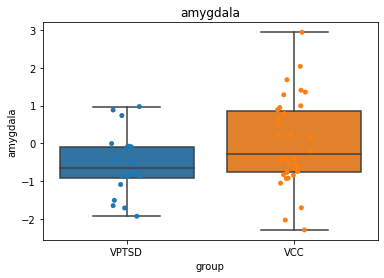

In [85]:
# Plot barplot to see differences
plt.title("amygdala")
sns.boxplot(x="group", y="amygdala", data=dfAll)
sns.stripplot(x="group", y="amygdala", data=dfAll)

In [86]:
# run simple one-tailed t-test
t = scipy.stats.ttest_ind(dfAll['amygdala'][dfAll['group']=='VCC'],dfAll['amygdala'][dfAll['group']=='VPTSD'], 
                     equal_var = True)

# one tailed
t

Ttest_indResult(statistic=1.9122322400330274, pvalue=0.06136253095312855)

# Check correlation between amg and behavior

In [73]:
dfAll['pcl_an'] = dfAll['pcl8'] + dfAll['pcl9'] + dfAll['pcl10'] + dfAll['pcl11'] + dfAll['pcl12'] 
dfAll

,sub_id,group,List,ScanDate,SCR,Resoponse2Shock,SCRValid,comment,MRI,num tasks,...,pcl14,pcl15,pcl16,pcl17,RCF?,RCF_Analyzed?,amygdala,amgsem,amgstd,pcl_an
0,004,VPTSD,A,8/11/2011,v,13.0,Yes,NaN,v,2.0,...,NaN,2.0,5.0,3.0,yes,no,2.176092,0.129360,3.055753,13.0
1,005,VCC,A,8/15/2011,v,12.0,Yes,NaN,v,1.0,...,1.0,1.0,1.0,1.0,no,NaN,-1.370441,0.097829,2.310928,5.0
2,008,VCC,A,8/16/2011,v,13.0,Yes,clear artifacts,v,1.0,...,2.0,1.0,4.0,3.0,no,NaN,1.881347,0.182009,4.299427,8.0
3,010,VCC,A,8/25/2011,v,10.0,Yes,clear artifacts,v,1.0,...,3.0,3.0,5.0,5.0,no,NaN,-1.427908,0.110995,2.621937,10.0
4,013,VCC,A,8/31/2011,v,13.0,Yes,68 trials,v,1.0,...,2.0,3.0,1.0,1.0,no,NaN,1.615637,0.075746,1.789270,10.0
5,016,VCC,A,8/31/2011,v,13.0,Yes,NaN,v,1.0,...,4.0,2.0,4.0,4.0,no,NaN,-1.030234,0.124465,2.940124,12.0
6,026,VPTSD,A,9/12/2011,v,13.0,Yes,No skin response,v,1.0,...,2.0,2.0,2.0,2.0,no,NaN,0.181761,0.078906,1.863926,9.0
7,027,VCC,A,9/12/2011,v,13.0,Yes,NaN,v,1.0,...,1.0,1.0,1.0,1.0,no,NaN,-0.966188,0.121945,2.880591,5.0
8,030,VPTSD,A,9/14/2011,v,13.0,Yes,NaN,v,1.0,...,4.0,2.0,4.0,2.0,no,NaN,-0.991894,0.082006,1.937140,12.0
9,038,VCC,A,9/26/2011,v,13.0,Yes,NaN,v,1.0,...,1.0,1.0,1.0,1.0,no,NaN,1.030982,0.109606,2.589123,5.0


## Use function to get both R and CI
 - consider using pyStan for that also

In [74]:
def pearsonr_ci(x,y,alpha=0.05):
    from scipy import stats
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [75]:
## Correlation to two groups
dfNoNan = dfAll.dropna(subset=['pcl_an'])
dfNoNan
pearsonr_ci(dfNoNan['pcl_an'], dfNoNan['amygdala'])

(-0.016769219766381203,
 0.9051335360740601,
 -0.2857677561417733,
 0.2546789541962144)

In [76]:
## correlation only for PTSD group
df_ptsd = dfNoNan[dfNoNan.group=='VPTSD']
pearsonr_ci(df_ptsd['pcl_an'], df_ptsd['amygdala'])

(0.11148000668977946,
 0.6495685678197258,
 -0.3610090655421474,
 0.5384259578007606)

In [77]:
## correlation only for Combat Controls group
dfpcl_cc = dfNoNan[dfNoNan.group=='VCC']
pearsonr_ci(dfpcl_cc['pcl_an'], dfpcl_cc['amygdala'])

(0.013513759062612901,
 0.9395352288659555,
 -0.3261423732945526,
 0.35007963140401843)

## generate publication plots

In [ ]:
import dabest
groups = ["CC", "PTSD"]
dgr = dfAll[dfAll.group.isin(groups)]

# load our data to dabest to produce graphs
dgr = dgr.rename(columns={"amygdala": "Amygdala activation CS+US minus CS+", "group": "Group"})
dgr_dabest = dabest.load(data=dgr, x='Group', y='Amygdala activation CS+US minus CS+', idx=('CC','PTSD'), ci=90)
dgr_dabest.mean_diff.plot()

In [ ]:
fgrid = sns.lmplot(x='pcl_an', y='amygdala',hue='group', data=dfNoNan)
               #legend_out = True)
# need to add annotation- because its like facet grid we need to set each axis
#ax1 = fgrid.axes[0,0]
    #Remove legend title
#ax1.text(8, .3, "r=-0.57, p<0.05", horizontalalignment='left', size='large', color='black')#, weight='semibold')
#ax1.text(8, .85, "r=0.08, N.S", horizontalalignment='left', size='large', color='black')#, weight='semibold')

#fgrid._legend.set_title('')
#ax.annotate("An annotation")#, horizontalalignment='left', size='medium', color='black', weight='semibold')


In [ ]:
# use plotrix
import plotly.express as px
px.strip(x='pcl_an', y='amygdala',  color='group', 
           data_frame=dfNoNan)

In [ ]:
## calculating mean SCR
meanSCR = pd.read_csv('meanSCR.csv')
meanSCR.head()

In [ ]:
sns.boxplot(y='meanSCR',x='group', data=meanSCR, orient='v')
plt.show()
scipy.stats.ttest_ind(meanSCR.meanSCR[meanSCR.group=='CC'],meanSCR.meanSCR[meanSCR.group=='PTSD'] )

Comparing groups in mean SCR response

In [ ]:
print(meanSCR.meanSCR[meanSCR.group=='CC'].mean())
print(meanSCR.meanSCR[meanSCR.group=='CC'].std())

In [ ]:
print(meanSCR.meanSCR[meanSCR.group=='PTSD'].mean())
print(meanSCR.meanSCR[meanSCR.group=='PTSD'].std())

## Behavior comparison - Anhedonia, PCL and CAPS

In [ ]:
## PCL Anhedonia
print(f'CC group mean {dfpcl_cc.pcl_An.mean()} and std {dfpcl_cc.pcl_An.std()}')
print(f'PTSD group mean {dfpcl_ptsd.pcl_An.mean()} and std {dfpcl_ptsd.pcl_An.std()}')
scipy.stats.ttest_ind(dfpcl_amg.pcl_An[dfpcl_amg.group=='PTSD'], dfpcl_amg.pcl_An[dfpcl_amg.group=='CC'])

In [ ]:
## PCL total
print(f'CC group mean {dfpcl_cc.pcl_total.mean()} and std {dfpcl_cc.pcl_total.std()}')
print(f'PTSD group mean {dfpcl_ptsd.pcl_total.mean()} and std {dfpcl_ptsd.pcl_total.std()}')
scipy.stats.ttest_ind(dfpcl_amg.pcl_total[dfpcl_amg.group=='PTSD'], dfpcl_amg.pcl_total[dfpcl_amg.group=='CC'])

In [ ]:
## CAPS
capsDF = pd.read_csv('CAPSScores.csv')
#capsDF = capsDF.rename(columns={"subject_id": "subject"})
for i in capsDF.iterrows():
    
    try:
        sub = i[1].subject.split('RCF')[1]
        capsDF.at[i[0], 'subject'] = sub
    except:
        print('no')

In [ ]:
capsD = pd.merge(capsDF, amg_ud )

In [ ]:
## PCL total
#print(f'CC group mean {} and std {capsD.caps_totalscorel[capsD.group=='CC'].std()}')
#print(f'PTSD group mean {capsD.caps_totalscorel.mean()} and std {capsD.caps_totalscorel.std()}')
scipy.stats.ttest_ind(capsD.caps_totalscorel[capsD.group=='PTSD'], capsD.caps_totalscorel[capsD.group=='CC'])

In [ ]:
print(capsD.caps_totalscorel[capsD.group=='CC'].mean())
print(capsD.caps_totalscorel[capsD.group=='CC'].std())

In [ ]:
print(capsD.caps_totalscorem[capsD.group=='CC'].mean())
print(capsD.caps_totalscorem[capsD.group=='CC'].std())

In [ ]:
scipy.stats.ttest_ind(capsD.caps_totalscorem[capsD.group=='PTSD'], capsD.caps_totalscorem[capsD.group=='CC'])

## Bayes factor - 
- We use rpy2 to call for the R package BayesFactor
- Entering the simple T test to get the BF

In [ ]:
from rpy2.robjects.packages import importr
bf = importr("BayesFactor")

In [ ]:
# Calculate SCR response
a = bf.ttest_tstat(t=1.07, n1=18, n2=19)

In [ ]:
1/np.exp(a[0])

In [ ]:
# calculate shock levels
1/np.exp(bf.ttest_tstat(t=0.42, n1=16, n2=14)[0])

In [ ]:
# calculate CAPS lifetime
1/np.exp(bf.ttest_tstat(t=12.46, n1=18, n2=19)[0])

In [ ]:
# calculate CAPS last month
1/np.exp(bf.ttest_tstat(t=12.51, n1=18, n2=19)[0])

In [ ]:
# calculate PCL anhedonia
1/np.exp(bf.ttest_tstat(t=4.5, n1=18, n2=19)[0])

In [ ]:
# calculate PCL total
1/np.exp(bf.ttest_tstat(t=5.16, n1=18, n2=19)[0])

In [ ]:
# calculate Age
1/np.exp(bf.ttest_tstat(t=0.92, n1=18, n2=19)[0])

## compare if there's significant difference between correlations of CC and PTSD with anhedonia

In [ ]:
from corrstats import independent_corr
checkCorr = independent_corr(-0.57, 0.08, n=18, n2 = 19, twotailed=True,
                             conf_level=0.95, method='fisher')
print(f'Correlation difference between CC and PTSD with anhedonia is {checkCorr}')